In [1]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd
from pyomo.environ import *


In [2]:
L1 = [(0, 0), (13, 1)]
L2 = [(0.2, 3), (4.2, 3)]

line = LineString([L1[0], L1[1]])
other = LineString([L2[0], L2[1]])
print(line.intersects(other))
# True
df= pd.read_csv('Hashi4.csv')
df= pd.read_csv('Hashi3.csv')
df= pd.read_csv('Hashi2.csv')

df= df.fillna(0) 
df

xmax = len(df.columns) 
ymax =len(df)
print(xmax ,ymax)

data, points, c ={}, {}, 0
for x in range(xmax):
    for y in range(ymax):
        if int(df.iloc[y,x]) >0:
            c+=1
            data[c,'x'] =x
            data[c,'y'] =y
            data[c,'v'] =int(df.iloc[y,x])
            print(x,y,int(df.iloc[y,x]))
        
data
Nc = c

points = [i for i in range(1,1+Nc)]

lines , ALL_lines= {}, {}
for c1 in points:
    for c2 in points: 
        condition1 = data[c1,'x'] == data[c2,'x']
        condition2 = data[c1,'y'] == data[c2,'y']
        if c1!=c2 and (condition1 or condition2) and c1>c2:
            lines[c1,c2] = 1
        if c1!=c2 and (condition1 or condition2):
            ALL_lines[c1,c2] = 1
            
lines   
df, data

False
6 6
0 0 1
0 2 4
0 5 3
2 0 4
2 2 7
2 4 3
3 1 2
3 3 2
3 5 3
4 0 2
4 2 1
4 4 1
5 1 3
5 3 5
5 5 3


(     a    b    c    d    e    f
 0  1.0  0.0  4.0  0.0  2.0  0.0
 1  0.0  0.0  0.0  2.0  0.0  3.0
 2  4.0  0.0  7.0  0.0  1.0  0.0
 3  0.0  0.0  0.0  2.0  0.0  5.0
 4  0.0  0.0  3.0  0.0  1.0  0.0
 5  3.0  0.0  0.0  3.0  0.0  3.0,
 {(1, 'x'): 0,
  (1, 'y'): 0,
  (1, 'v'): 1,
  (2, 'x'): 0,
  (2, 'y'): 2,
  (2, 'v'): 4,
  (3, 'x'): 0,
  (3, 'y'): 5,
  (3, 'v'): 3,
  (4, 'x'): 2,
  (4, 'y'): 0,
  (4, 'v'): 4,
  (5, 'x'): 2,
  (5, 'y'): 2,
  (5, 'v'): 7,
  (6, 'x'): 2,
  (6, 'y'): 4,
  (6, 'v'): 3,
  (7, 'x'): 3,
  (7, 'y'): 1,
  (7, 'v'): 2,
  (8, 'x'): 3,
  (8, 'y'): 3,
  (8, 'v'): 2,
  (9, 'x'): 3,
  (9, 'y'): 5,
  (9, 'v'): 3,
  (10, 'x'): 4,
  (10, 'y'): 0,
  (10, 'v'): 2,
  (11, 'x'): 4,
  (11, 'y'): 2,
  (11, 'v'): 1,
  (12, 'x'): 4,
  (12, 'y'): 4,
  (12, 'v'): 1,
  (13, 'x'): 5,
  (13, 'y'): 1,
  (13, 'v'): 3,
  (14, 'x'): 5,
  (14, 'y'): 3,
  (14, 'v'): 5,
  (15, 'x'): 5,
  (15, 'y'): 5,
  (15, 'v'): 3})

In [3]:
def draw(L, LW=1):
    if LW > 1:
        LW =8
        plt.plot([L[0][0],L[1][0]], [L[0][1],L[1][1]], lw=LW)
    else:
        plt.plot([L[0][0],L[1][0]], [L[0][1],L[1][1]], lw=2, c= 'k')

In [4]:
model = AbstractModel()
model.i = RangeSet(Nc)
model.j = Set(initialize=model.i)

model.X = Var(model.i,model.j,bounds=(0,2),initialize=0, within=Integers)
model.U = Var(model.i,model.j,bounds=(0,1),initialize=0, within=Binary)
model.flow = Var(model.i,model.j,bounds=(0,1),initialize=0, within=Reals)
model.s = Var(bounds=(0,1),initialize=0, within=Reals)


def rule_C1(model,c): 
    return   data[c,'v'] == sum(model.X[c,j] for j in model.j if (c,j) in lines) +\
                            sum(model.X[j,c] for j in model.j if (j,c) in lines)
model.C1 = Constraint(model.i,rule=rule_C1)


def rule_C2(model,m,n,i,j): 
    L1 = [(data[i,'x'],data[i,'y']), (data[j,'x'],data[j,'y'])]
    L2 = [(data[m,'x'],data[m,'y']), (data[n,'x'],data[n,'y'])]
    line = LineString([L1[0], L1[1]])
    other = LineString([L2[0], L2[1]])
    a = line.intersection(other)
    a = line.intersection(other)
    cancel_con = len(set([i,j,m,n])) <4
    con0 = (m,n) in lines and (i,j) in lines and (m,n)!=(i,j) and (m*n>i*j)
    con1 = con0 and (not cancel_con) and line.intersects(other)
    con2 = con0 and (cancel_con and a.length> 1) and line.intersects(other) and (m,n)!=(i,j) and (m*n>i*j)

    if con1 or con2:
        return   model.U[i,j]+model.U[m,n] <= 1
    else:
        return Constraint.Skip
model.C2 = Constraint(model.i,model.i,model.i,model.i, rule=rule_C2)


def rule_C3(model,i,j):
    if (i,j) in lines:
        return   model.X[i,j]<= 2*model.U[i,j]
    else:
        return Constraint.Skip
model.C3 = Constraint(model.i,model.j, rule=rule_C3)

def rule_C3B(model,i,j):
    if (i,j) in lines:
        return   model.X[i,j]>= model.U[i,j]
    else:
        return Constraint.Skip
model.C3B = Constraint(model.i,model.j, rule=rule_C3B)


def rule_C4A(model,i):
    if i ==1 :
        return model.s - 0.001 == sum( model.flow[i,j]-model.flow[j,i] for j in model.j if (i,j) in ALL_lines ) 
    else:
        return         - 0.001 == sum( model.flow[i,j]-model.flow[j,i] for j in model.j if (i,j) in ALL_lines ) 
model.C4A = Constraint(model.i, rule=rule_C4A)

def rule_C4B(model,i,j):
    if (i,j) in lines:
        return   model.flow[i,j]<= model.U[i,j]
    elif (j,i) in lines:
        return   model.flow[i,j]<= model.U[j,i]
    else:
        return Constraint.Skip
model.C4B = Constraint(model.i,model.j, rule=rule_C4B)

def rule_OF(model):
    return  sum(model.U[i,j] for (i,j) in lines) 
model.obj1 = Objective(rule=rule_OF, sense=minimize)
instance = model.create_instance()  


In [5]:
opt = SolverFactory('cbc')
opt.options = {'sec': 600, 'threads': 4, 'ratio': 0.1}
results = opt.solve(instance)

from pyomo.opt import SolverStatus, TerminationCondition
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
     print ("this is feasible and optimal and nothing more")
elif results.solver.termination_condition == TerminationCondition.infeasible:
     print ("do something about it? or exit?")
else:
     print ('ERROR ' + str(results.solver))
print('OF= ', value(instance.obj1) )


this is feasible and optimal and nothing more
OF=  14.0


2 1 1.0
3 2 1.0
5 2 2.0
5 4 2.0
6 5 2.0
9 3 2.0
10 4 2.0
11 5 1.0
12 6 1.0
13 7 2.0
14 8 2.0
14 13 1.0
15 9 1.0
15 14 2.0


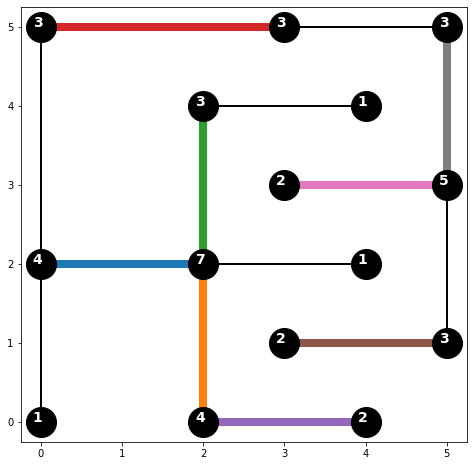

In [10]:
plt.figure(figsize=(8,8))

for i in instance.i:
    plt.scatter(data[i,'x'],data[i,'y'],s=900, c='k', zorder=3)
    plt.text(data[i,'x']-0.1,data[i,'y'],s=str(data[i,'v']), c='w', fontweight='bold', fontsize=14)
    
plt.savefig(f'Sashi Base .png', format='png', dpi=400)

plt.grid()
maxx, maxy= max([data[c,'x'] for c in instance.i])+1 ,  max([data[c,'y'] for c in instance.i])+1
counter = 1
for (i,j) in lines:
    if value(instance.X[i,j])>0 and counter <500:
        print(i,j, value(instance.X[i,j]))
        L = [(data[i,'x'],data[i,'y']), (data[j,'x'],data[j,'y'])]
        draw(L, value(instance.X[i,j]))        
        plt.xticks(range(maxx))
        plt.yticks(range(maxy))
        counter+=1

plt.xticks(range(maxx))
plt.yticks(range(maxy))
plt.grid()

plt.savefig(f'Sashi  .png', format='png', dpi=400)

plt.show()

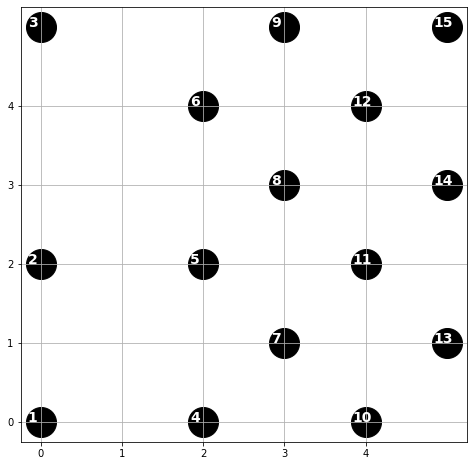

In [7]:
plt.figure(figsize=(8,8))

for i in instance.i:
    plt.scatter(data[i,'x'],data[i,'y'],s=900, c='k')
    plt.text(data[i,'x']-0.16,data[i,'y'],s=str(i), c='w', fontweight='bold', fontsize=14)
    
plt.grid()
plt.xticks(range(maxx))
plt.yticks(range(maxy))

plt.show()